# Step 1: Split the dataset into training and testing sets
In the dataset, we have 100 audio clips for each of the abovementioned 4 emotions. For each emotion category, randomly select 70 as training samples and the remaining 30 as testing samples. 

In [1]:
import os

ROOT = 'data_folder'
ANGRY = ROOT + '\\angry'
FEAR = ROOT + '\\fear'
HAPPY = ROOT + '\\happy'
SAD = ROOT + '\\sad'

angry, fear, happy, sad = [], [], [], []

for folder, x_values in zip([ANGRY, FEAR, HAPPY, SAD], [angry, fear, happy, sad]):
    for path, subdirs, files in os.walk(folder):
        for name in files:
            x_values.append(os.path.join(path, name))

In [3]:
from sklearn.model_selection import train_test_split

angry_train, angry_test = train_test_split(angry, test_size=0.3)
fear_train, fear_test = train_test_split(fear, test_size=0.3)
happy_train, happy_test = train_test_split(happy, test_size=0.3)
sad_train, sad_test = train_test_split(sad, test_size=0.3)

In [4]:
import pandas as pd

In [5]:
train = pd.DataFrame({'path': angry_train, 'emotion': 'angry'})
train = pd.concat([train, pd.DataFrame({'path': fear_train, 'emotion': 'fear'})])
train = pd.concat([train, pd.DataFrame({'path': happy_train, 'emotion': 'happy'})])
train = pd.concat([train, pd.DataFrame({'path': sad_train, 'emotion': 'sad'})])

train.reset_index(drop=True, inplace=True)

train

,path,emotion
0,data_folder\angry\YAF_mob_angry.wav,angry
1,data_folder\angry\YAF_void_angry.wav,angry
2,data_folder\angry\YAF_red_angry.wav,angry
3,data_folder\angry\YAF_nice_angry.wav,angry
4,data_folder\angry\YAF_met_angry.wav,angry
...,...,...
275,data_folder\sad\YAF_merge_sad.wav,sad
276,data_folder\sad\YAF_mode_sad.wav,sad
277,data_folder\sad\YAF_vine_sad.wav,sad
278,data_folder\sad\YAF_wire_sad.wav,sad


In [6]:
test = pd.DataFrame({'path': angry_test, 'emotion': 'angry'})
test = pd.concat([test, pd.DataFrame({'path': fear_test, 'emotion': 'fear'})])
test = pd.concat([test, pd.DataFrame({'path': happy_test, 'emotion': 'happy'})])
test = pd.concat([test, pd.DataFrame({'path': sad_test, 'emotion': 'sad'})])

test.reset_index(drop=True, inplace=True)

test

,path,emotion
0,data_folder\angry\YAF_rat_angry.wav,angry
1,data_folder\angry\YAF_tire_angry.wav,angry
2,data_folder\angry\YAF_turn_angry.wav,angry
3,data_folder\angry\YAF_seize_angry.wav,angry
4,data_folder\angry\YAF_soup_angry.wav,angry
...,...,...
115,data_folder\sad\YAF_south_sad.wav,sad
116,data_folder\sad\YAF_note_sad.wav,sad
117,data_folder\sad\YAF_shout_sad.wav,sad
118,data_folder\sad\YAF_moon_sad.wav,sad


# Step 2: Exploratory Data Analysis
This stage is the very initial stage of your data analysis. You may want to know the label distribution of the dataset. You may also want to select sample audio, listen to them and plot them in both the time and frequency domain.

angry    70
fear     70
happy    70
sad      70
Name: emotion, dtype: int64


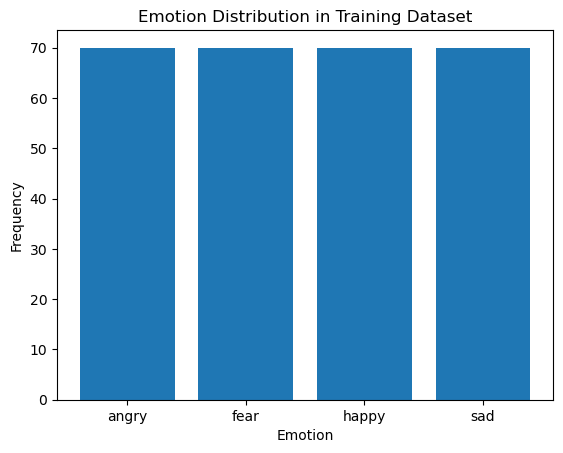

In [7]:
import matplotlib.pyplot as plt

data = train['emotion'].value_counts()
print(data)

fig, ax = plt.subplots(1,1)
ax.bar([0,1,2,3], data.values)
plt.xticks([0,1,2,3], data.index.values)

ax.set_xlabel('Emotion')
ax.set_ylabel('Frequency')

ax.set_title('Emotion Distribution in Training Dataset')

plt.show()

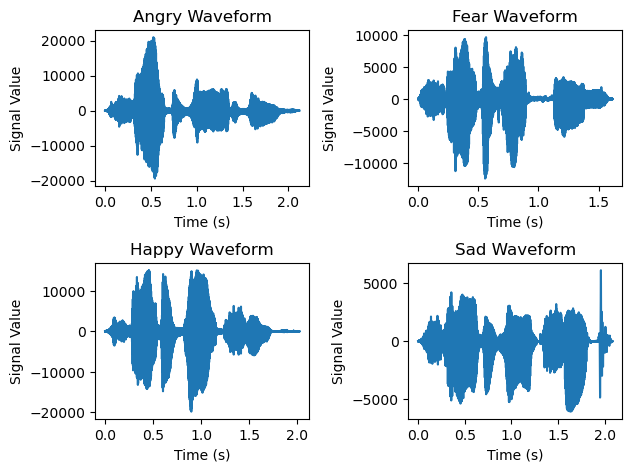

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from random import randrange

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

axes = [ax1, ax2, ax3, ax4]
i = randrange(0, 70)
samples = [angry_train[i], fear_train[i], happy_train[i], sad_train[i]]
names = ['Angry', 'Fear', 'Happy', 'Sad']

for ax, sample, name in zip(axes, samples, names):
    w = wave.open(sample, 'r')
    signal = w.readframes(-1)
    signal = np.frombuffer(signal, dtype=np.int16)
    
    frame_rate = w.getframerate()
    n_frames = w.getnframes()
    t = np.linspace(0, n_frames/frame_rate, num=n_frames)
    
    ax.plot(t, signal)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'{name} Waveform')
    
fig.tight_layout(pad=1)
plt.show()

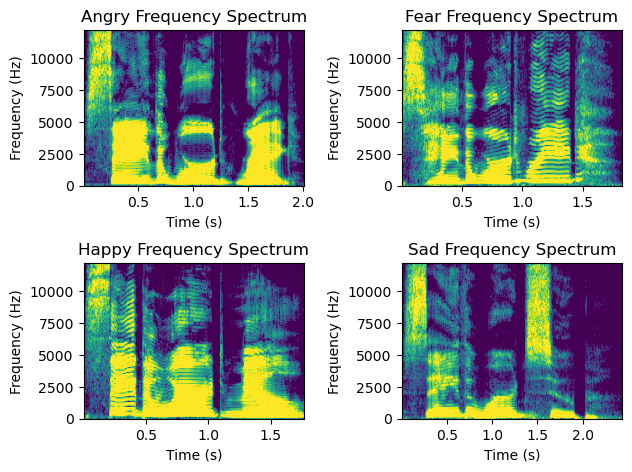

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from random import randrange

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

axes = [ax1, ax2, ax3, ax4]
i = randrange(0, 70)
samples = [angry_train[i], fear_train[i], happy_train[i], sad_train[i]]
names = ['Angry', 'Fear', 'Happy', 'Sad']

for ax, sample, name in zip(axes, samples, names):
    w = wave.open(sample, 'r')
    signal = w.readframes(-1)
    signal = np.frombuffer(signal, dtype=np.int16)
    
    frame_rate = w.getframerate()
    
    ax.specgram(signal, Fs=frame_rate, vmin=-20, vmax=20)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title(f'{name} Frequency Spectrum')

fig.tight_layout(pad=1)
plt.show()

# Step 3: Acoustic Feature Extraction
You will extract acoustic features by using librosa or openSMILE. They are both popular Python libraries for automatic acoustic feature extraction.

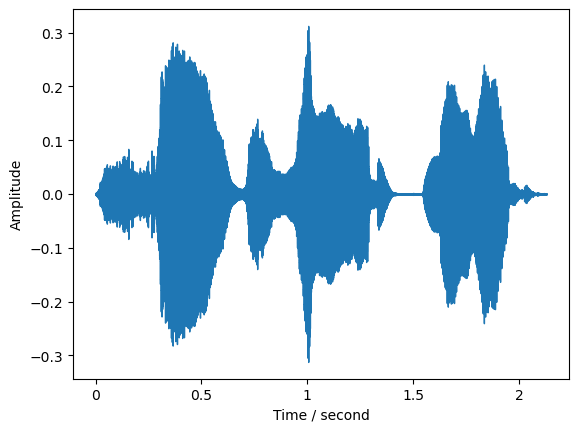

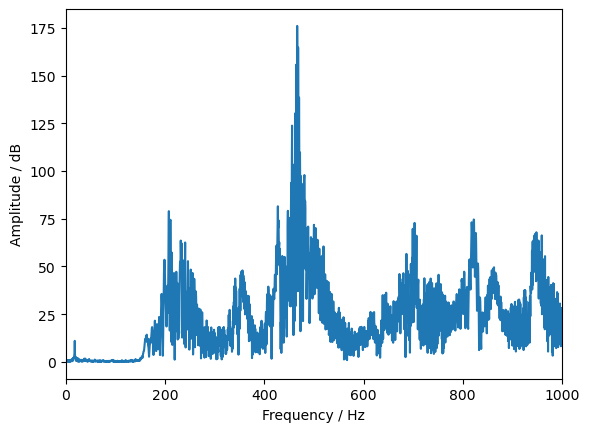

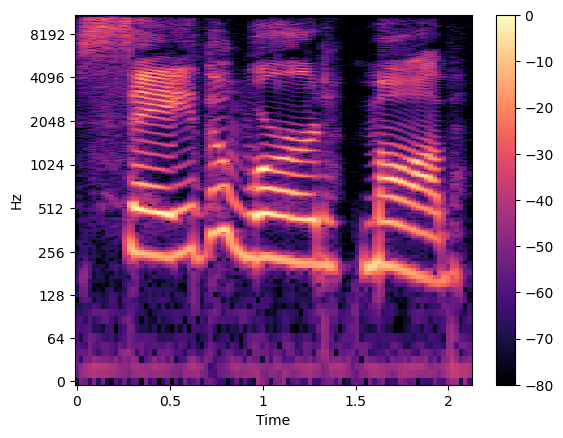

[0.00187408 0.00636288 0.01078749 0.01189073 0.01228055 0.01286571
 0.01416436 0.01356243 0.01125206 0.00965246 0.01065707 0.01305152
 0.02028087 0.04452603 0.05869866 0.05802303 0.05465797 0.05187176
 0.0497168  0.04993275 0.0528049  0.0530817  0.04589223 0.03273381
 0.02440406 0.02020682 0.01834098 0.0135214  0.0073648  0.00460827
 0.00608957 0.0174671  0.02640506 0.02876355 0.02980815 0.02570057
 0.01649868 0.01311411 0.01357996 0.01438563 0.01770106 0.03704399
 0.05778266 0.07069406 0.06010129 0.04385137 0.03909228 0.04016751
 0.04123645 0.03776026 0.03465468 0.0333483  0.03233294 0.03181597
 0.03436152 0.03138375 0.01666207 0.01158177 0.0139587  0.00980213
 0.00421728 0.00095652 0.00038258 0.00028213 0.00025365 0.00033679
 0.00432457 0.01346951 0.0209402  0.02471499 0.03100175 0.04194197
 0.04847672 0.04814297 0.04355094 0.04013811 0.03517528 0.03398917
 0.04307203 0.04926389 0.04556032 0.04038726 0.03184192 0.02295128
 0.01304751 0.00603017 0.00413405 0.00343238 0.00340707 0.0015

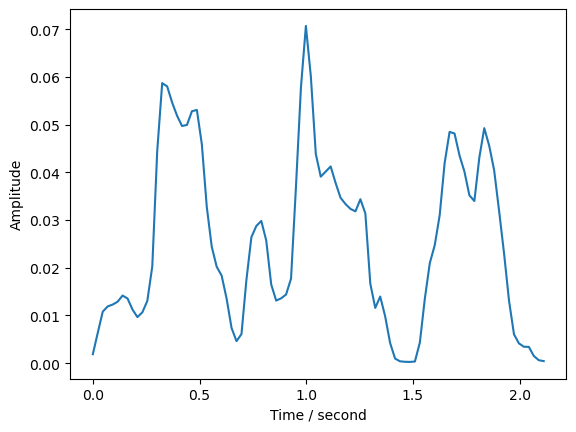

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -468.251862 -400.374084 -390.026855 -375.680634 -363.314178 -359.299805   
1  -62.204109  -83.937698  -96.133636  -87.006905  -82.403763  -85.468147   
2   31.625011   58.669357   73.173950   60.420021   46.398140   38.045380   
3    7.315122    3.044158   -6.282699  -27.401115  -39.527596  -37.935421   
4   -8.775636    0.394960   13.187057   13.756506    7.534750    9.243439   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -342.790131 -341.067963 -343.540955 -349.807312 -359.698669 -321.400940  
1  -80.928253  -78.926987  -70.197906  -67.390442  -75.132065  -41.167301  
2   29.527264   27.672405   28.816860   29.796131   32.406868   65.443436  
3  -37.044205  -32.858891  -30.880219  -29.932095  -32.397594  -11.849166  
4   11.714078   13.958788    8.213356    5.964545    9.142911   18.974987  


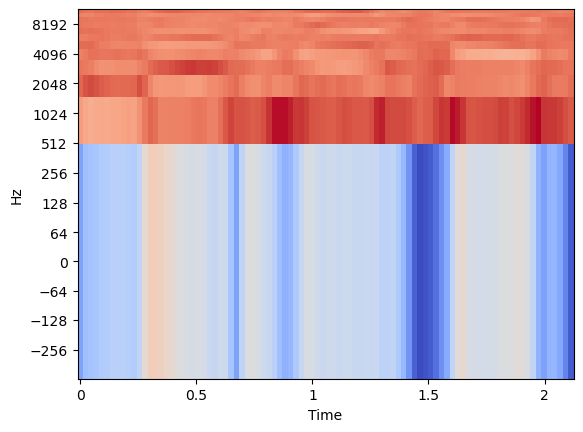

        ZCR
0  0.297852
1  0.481445
2  0.668945
3  0.731934
4  0.766113


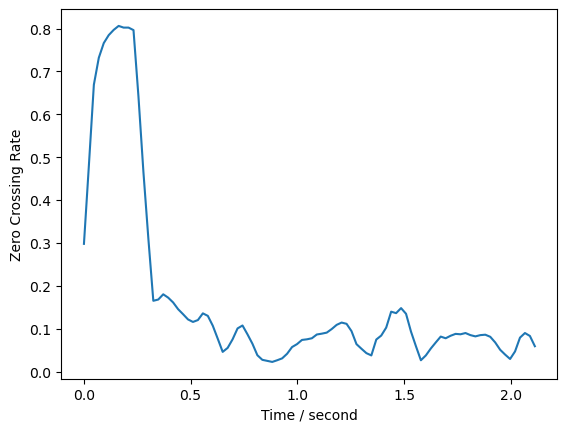

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.513971  0.473287  0.658514  0.962101  0.800034  0.481004  0.418103   
1  0.332811  0.351682  0.633093  1.000000  1.000000  1.000000  1.000000   
2  0.245570  0.207924  0.338670  0.529830  0.674667  0.712066  0.548148   
3  0.201053  0.174927  0.344620  0.604879  0.616049  0.807962  0.920572   
4  0.174060  0.109958  0.126012  0.192224  0.180976  0.218061  0.285442   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.427329  0.442622   0.778850   0.484302   0.489940  
1  1.000000  1.000000   1.000000   1.000000   1.000000  
2  0.504840  0.490823   0.579304   0.558801   0.562586  
3  0.683525  0.474740   0.656610   0.547642   0.798933  
4  0.242596  0.161627   0.225021   0.205373   0.240316  


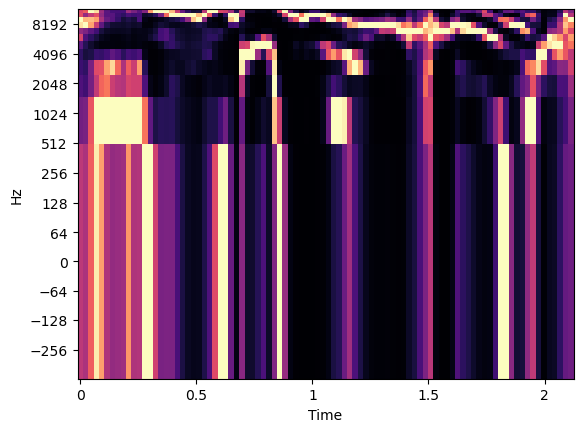

   Mel_Spectrogram_1  Mel_Spectrogram_2  Mel_Spectrogram_3  Mel_Spectrogram_4  \
0           0.000048           0.000401           0.000602           0.000230   
1           0.000041           0.000071           0.000052           0.000090   
2           0.000023           0.000046           0.000032           0.000097   
3           0.000040           0.000082           0.000072           0.000194   
4           0.000022           0.000040           0.000060           0.000188   

   Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  Mel_Spectrogram_8  \
0           0.000219           0.000171           0.000180           0.000165   
1           0.000160           0.000361           0.001110           0.001086   
2           0.000235           0.000193           0.000523           0.000848   
3           0.000385           0.000416           0.000690           0.000726   
4           0.000330           0.000316           0.000469           0.000378   

   Mel_Spectrogram_9  Mel_

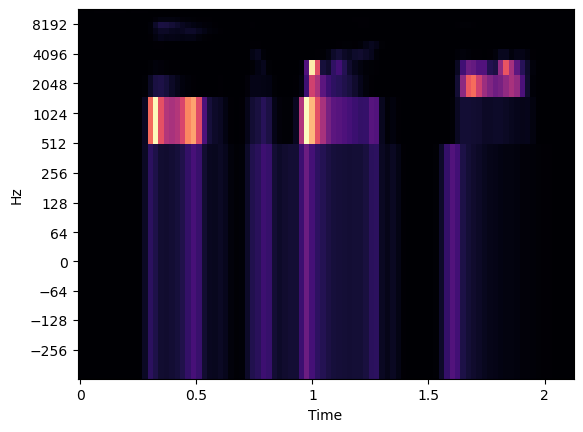

   Loudness      MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5  \
0  0.001874 -468.251862 -400.374084 -390.026855 -375.680634 -363.314178   
1  0.006363  -62.204109  -83.937698  -96.133636  -87.006905  -82.403763   
2  0.010787   31.625011   58.669357   73.173950   60.420021   46.398140   
3  0.011891    7.315122    3.044158   -6.282699  -27.401115  -39.527596   
4  0.012281   -8.775636    0.394960   13.187057   13.756506    7.534750   

       MFCC_6      MFCC_7      MFCC_8      MFCC_9  ...  Mel_Spectrogram_3  \
0 -359.299805 -342.790131 -341.067963 -343.540955  ...           0.000602   
1  -85.468147  -80.928253  -78.926987  -70.197906  ...           0.000052   
2   38.045380   29.527264   27.672405   28.816860  ...           0.000032   
3  -37.935421  -37.044205  -32.858891  -30.880219  ...           0.000072   
4    9.243439   11.714078   13.958788    8.213356  ...           0.000060   

   Mel_Spectrogram_4  Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  \
0    

In [10]:
# read audio files
import librosa
import numpy as np
import matplotlib.pyplot as plt

signal, sample_rate = librosa.load(angry_train[0])

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# plot the time-frequency variation of the audio
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
#
# audio feature extraction: loudness
import pandas as pd

df_loudness = pd.DataFrame()
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
plt.figure(4)
times = librosa.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()
#
# audio feature extraction: mel-frequency cepstral coefficients
df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

# audio feature extraction: zero crossing rate
df_zero_crossing_rate = pd.DataFrame()
zcr = librosa.feature.zero_crossing_rate(y=signal)
df_zero_crossing_rate['ZCR'] = zcr[0]
print(df_zero_crossing_rate.head(5))
plt.figure(6)
times = librosa.times_like(zcr)
plt.plot(times, zcr[0])
plt.xlabel("Time / second")
plt.ylabel("Zero Crossing Rate")
plt.show()

# audio feature extraction: chroma
df_chroma = pd.DataFrame()
chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

# audio feature extraction: mel spectrogram
df_mel_spectrogram = pd.DataFrame()
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(mel_spectrogram)):
    df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
print(df_mel_spectrogram.head(5))
plt.figure(8)
librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

# combine all features
feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
print(feature_matrix.head(5))
feature_matrix.to_csv('feature_matrix.csv')

In [12]:
data = features(angry_train[-1])
len(data)

38

# Step 4: Feature Post-processing
Please refer to the slide of this class.

In [19]:
train['features'] = train['path'].apply(features)
train

,path,emotion,features
0,data_folder\angry\YAF_mob_angry.wav,angry,"[0.025371501983545233, -36.2675895690918, -31...."
1,data_folder\angry\YAF_void_angry.wav,angry,"[0.025093951823410975, -37.018882751464844, -3..."
2,data_folder\angry\YAF_red_angry.wav,angry,"[0.02224210461980865, -38.17646789550781, -35...."
3,data_folder\angry\YAF_nice_angry.wav,angry,"[0.027004242673848544, -33.74238586425781, -32..."
4,data_folder\angry\YAF_met_angry.wav,angry,"[0.03297774459824928, -37.59309387207031, -33...."
...,...,...,...
275,data_folder\sad\YAF_merge_sad.wav,sad,"[0.01993745770428999, -42.78907775878906, -34...."
276,data_folder\sad\YAF_mode_sad.wav,sad,"[0.02282428540484104, -33.68281173706055, -26...."
277,data_folder\sad\YAF_vine_sad.wav,sad,"[0.028856441332543618, -37.252201080322266, -3..."
278,data_folder\sad\YAF_wire_sad.wav,sad,"[0.01886521496218854, -40.406803131103516, -35..."


In [16]:
test['features'] = test['path'].apply(features)
test

,path,emotion,features
0,data_folder\angry\YAF_rat_angry.wav,angry,"[0.028857609607524325, -35.055721282958984, -3..."
1,data_folder\angry\YAF_tire_angry.wav,angry,"[0.023827692631541764, -41.13325881958008, -36..."
2,data_folder\angry\YAF_turn_angry.wav,angry,"[0.02276364538987255, -36.73345947265625, -35...."
3,data_folder\angry\YAF_seize_angry.wav,angry,"[0.020614155599249437, -35.27133560180664, -33..."
4,data_folder\angry\YAF_soup_angry.wav,angry,"[0.024316468342644084, -37.61635971069336, -35..."
...,...,...,...
115,data_folder\sad\YAF_south_sad.wav,sad,"[0.01997025632886599, -40.09352493286133, -35...."
116,data_folder\sad\YAF_note_sad.wav,sad,"[0.02038725735118402, -38.305381774902344, -32..."
117,data_folder\sad\YAF_shout_sad.wav,sad,"[0.027275507193331473, -33.31181716918945, -27..."
118,data_folder\sad\YAF_moon_sad.wav,sad,"[0.029482373708421234, -36.392635345458984, -2..."


In [21]:
X_train, y_train = train['features'].to_list(), train['emotion']
X_test, y_test = test['features'].to_list(), test['emotion']

# Step 5: Build your audio emotion recognition model
Provide the extracted set of acoustic features from the training dataset to your classification model. Note that this is a multi-class classification problem. Please select appropriate classifiers since some of the classifiers are not applicable here (e.g., logistic regression).

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # (setting multi_class='multinomial')
from sklearn.neighbors import KNeighborsClassifier

gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression(multi_class='multinomial', max_iter=10000)
knn = KNeighborsClassifier()

In [23]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Step 6: Model evaluation
Evaluate your model performance with the testing dataset. Please compare the performance of different classifiers using the same acoustic feature and the performance of the same classifier using different acoustic features. Finally, discuss your experimental results and submit the assignment report.

In [27]:
gbc_predicted = gbc.predict(X_test)
dt_predicted = dt.predict(X_test)
lr_predicted = lr.predict(X_test)
knn_predicted = knn.predict(X_test)

predictions = [gbc_predicted, dt_predicted, lr_predicted, knn_predicted]

In [28]:
from sklearn.metrics import classification_report

model_names = ['Gradient Boosting Classifier', 'Decision Tree Classifier', 'Multi Class Logistic Regression', 'K Neighbors Classifier']

for model, p in zip(model_names, predictions):
    print(model)
    print(classification_report(y_test, p))

Gradient Boosting Classifier
              precision    recall  f1-score   support

       angry       0.87      0.90      0.89        30
        fear       0.93      0.90      0.92        30
       happy       0.94      0.97      0.95        30
         sad       1.00      0.97      0.98        30

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Decision Tree Classifier
              precision    recall  f1-score   support

       angry       0.86      0.80      0.83        30
        fear       0.77      0.77      0.77        30
       happy       0.96      0.77      0.85        30
         sad       0.68      0.87      0.76        30

    accuracy                           0.80       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.80      0.80       120

Multi Class Logistic Regression
              precision    recall  f1-score 

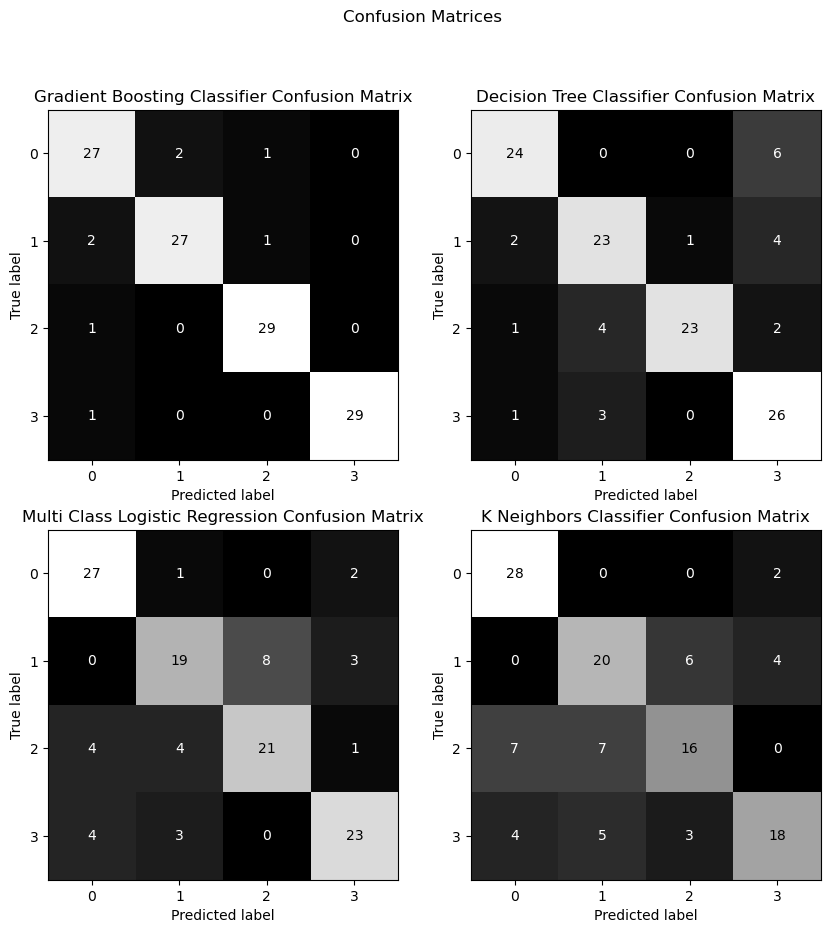

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

for model, prediction, ax in zip(model_names, predictions, [ax1, ax2, ax3, ax4]):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(include_values=True, cmap='gray', ax=ax, colorbar=False)
    disp.ax_.set_title(f'{model} Confusion Matrix')

plt.suptitle('Confusion Matrices')
plt.show()

In [30]:
"""
The following 3 functions were written by vinyluis on GitHub
The original code can be found here: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
"""

'\nThe following 3 functions were written by vinyluis on GitHub\nThe original code can be found here: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb\n'

In [31]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [32]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [33]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [34]:
import seaborn as sns

def plot_auc(model):
    plt.figure(figsize=(12,8))
    bins = [i/20 for i in range(20)] + [1]
    classes = model.classes_
    y_proba = model.predict_proba(X_test)
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        df_aux = pd.DataFrame(X_test.copy())
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 4, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 4, i+5)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve")
        
    plt.tight_layout()

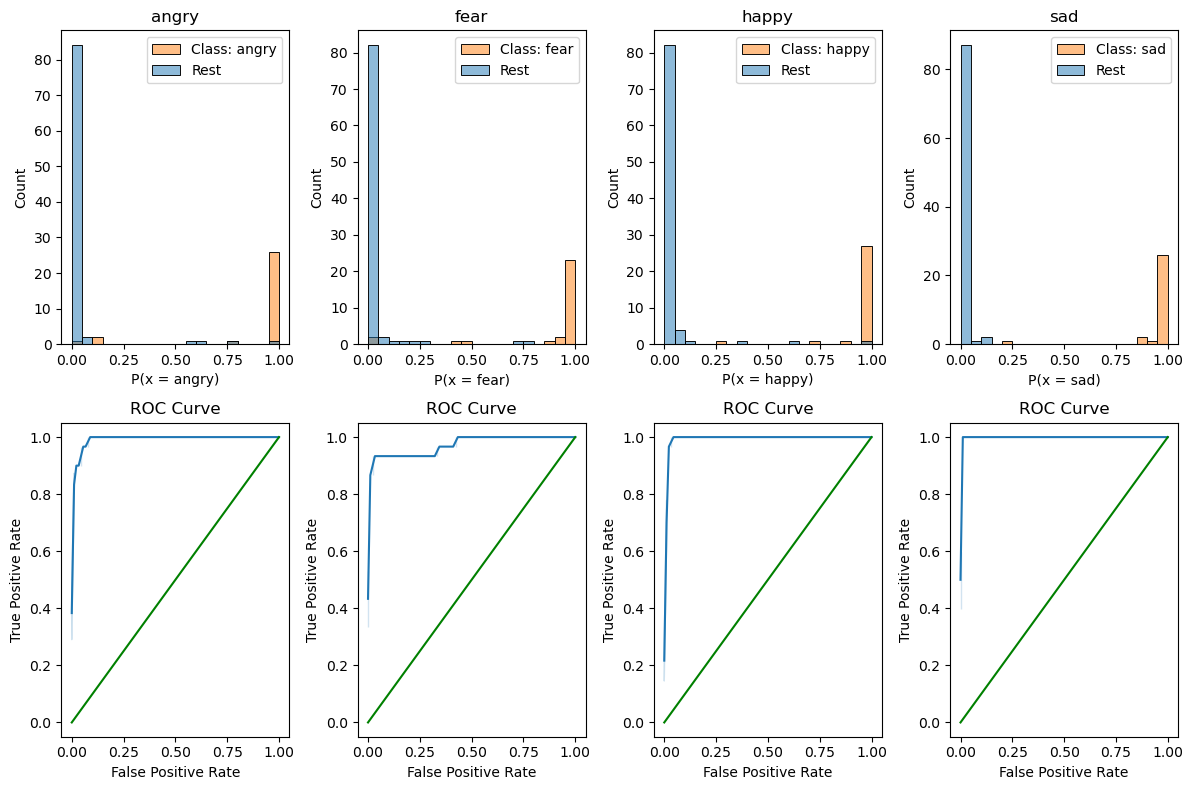

In [35]:
# Gradient Boosting Classifier
plot_auc(gbc)

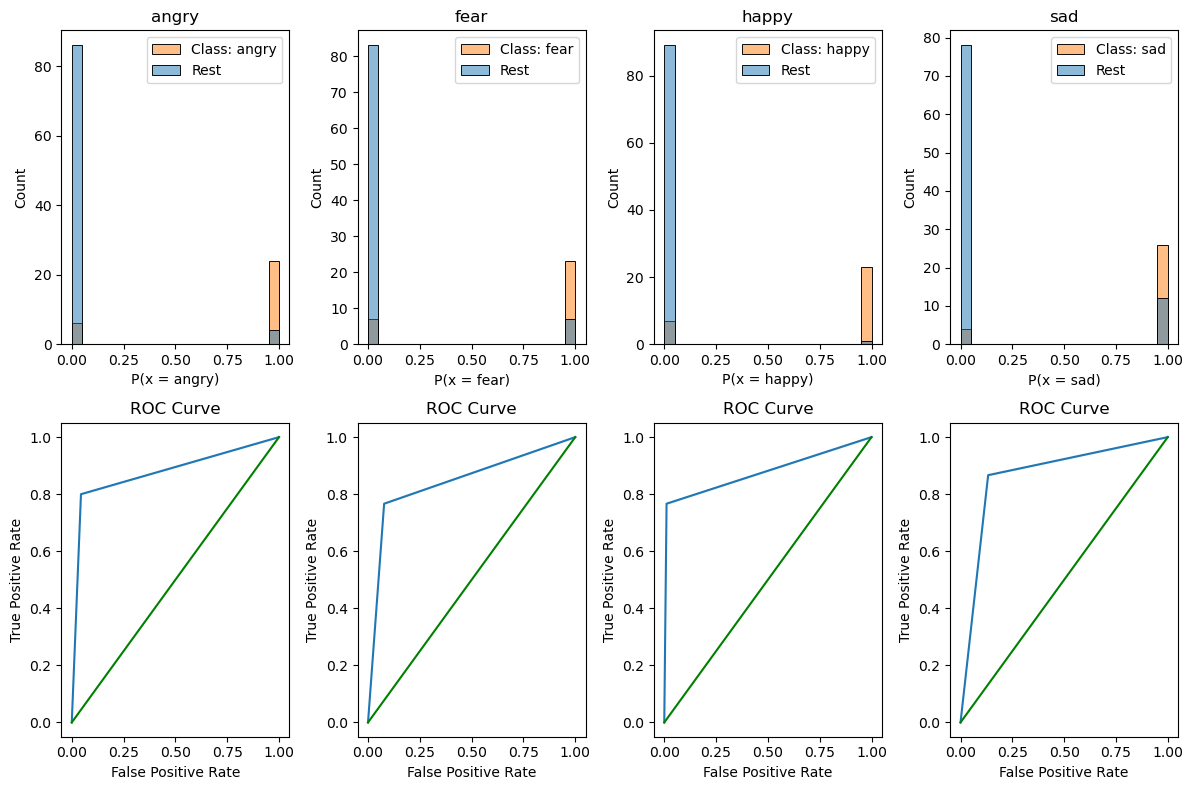

In [36]:
# Decision Tree Classifier
plot_auc(dt)

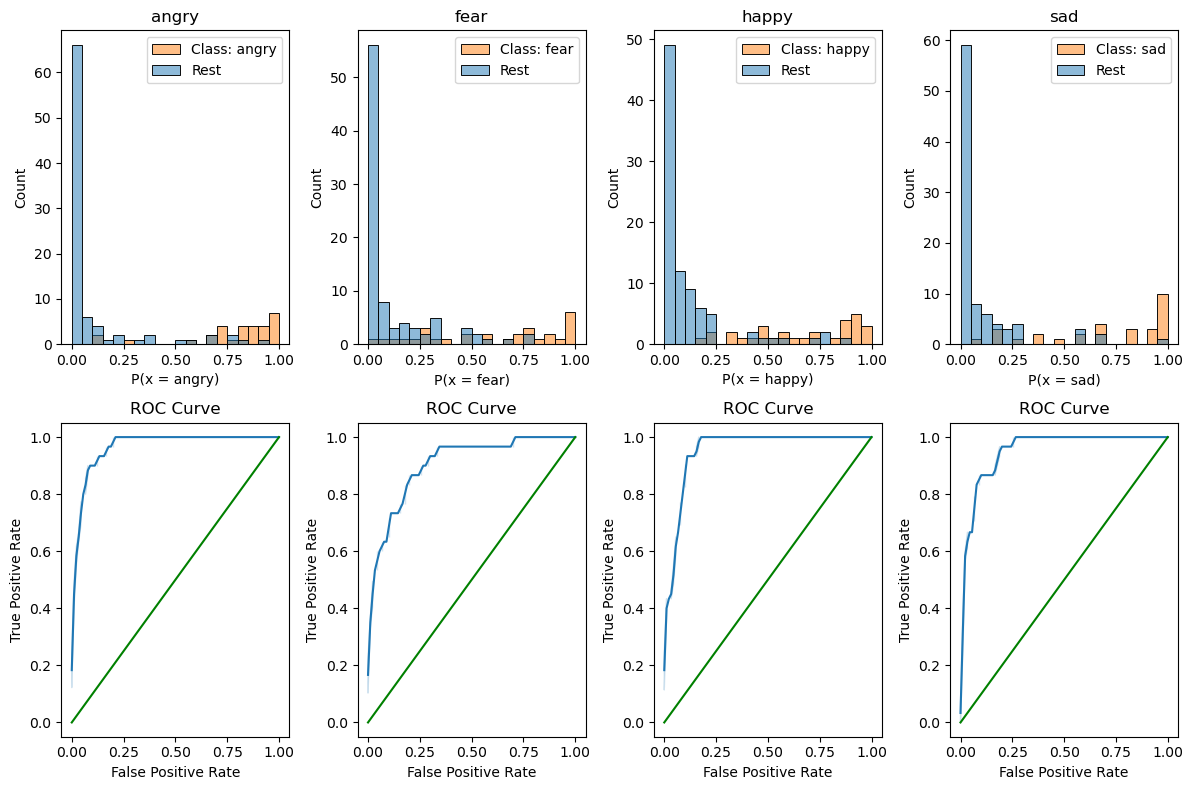

In [37]:
# Multi Class Logistic Regression
plot_auc(lr)

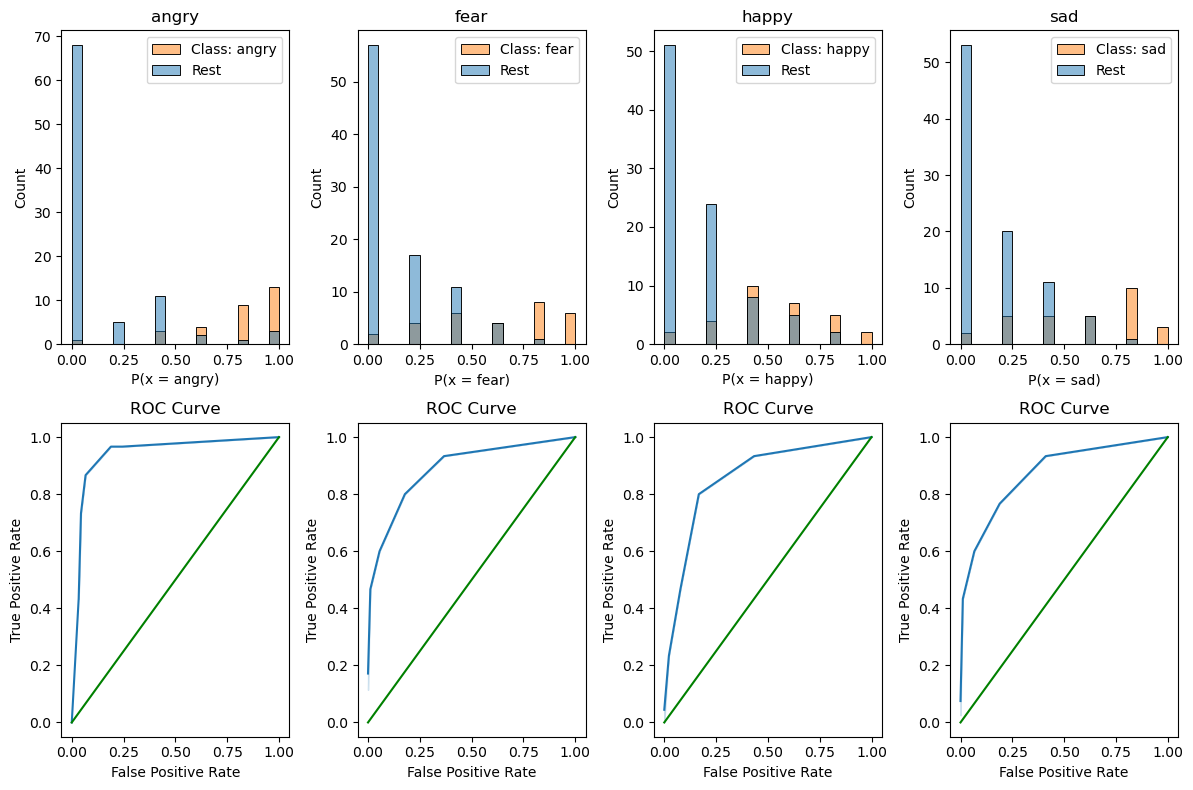

In [38]:
# K Neighbors Classifier
plot_auc(knn)